In [1]:
#importamos las librerias pertienentes.

import pandas as pd
import numpy as np
import warnings
from datetime import datetime


In [2]:
aa= pd.read_csv('AccidentesAviones.csv')
aa.head()
# importamos el archivo base del proyecto en un df.

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [3]:
aa.shape


(5008, 18)

-Dicionario de datos en tabla:
    fecha - fecha del accidente.
    hora_declarada- hora local formato 24h hh:mm
    ruta - locacion del accidente
    operador - aerolinea en operacion de la aeronave
    numero de vuelo - nuemero de vuelo asignado a esta aeronave
    ruta_vuelo- ruta que cumplia la aeronave
    tipo - tipo de aeronave
    icao registro - registro icao de la aeronave
    cn_ln -serie de la aeronave 
    all board- total personas en el vuelo
    pasajeros a bordo- pasajeros a bordo
    crew aboard -tripulantes a bordo
    total fatalities -total de vidas perdidas
    passenger fatalities - pasajeros fallecidos
    crew fatalities - tripulantes fallecidos
    ground - total de muertos en tierra
    summary - breve descripcion del accidente y su posible causa

    

In [4]:
# primero ponerle un nombre entendible a las columnas.
aa.rename(columns={ 'fecha': 'fecha', 
                    'HORA declarada': 'hora',
                    'Ruta': 'lugar',
                    'OperadOR': 'empresa_operadora',
                    'flight_no': 'vuelo_numero',
                    'ac_type': 'tipo_aeronave',
                    'registration': 'registro_aeronave',
                    'cn_ln': 'registro_fuselaje',
                    'all_aboard': 'total_personas',
                    'PASAJEROS A BORDO': 'total_pasajeros',
                    'crew_aboard': 'total_tripulantes',
                    'cantidad de fallecidos': 'total_fallecidos',
                    'passenger_fatalities': 'pasajeros_fallecidos',
                    'crew_fatalities': 'tripulantes_fallecidos',
                    'ground': 'muertes_tierra',
                    'summary': 'Descripcion'
}, inplace=True)
aa

,Unnamed: 0,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,registro_fuselaje,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,muertes_tierra,Descripcion
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [5]:
# visualizamos el tipo de datos para formatear.
aa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   hora                    5008 non-null   object
 3   lugar                   5008 non-null   object
 4   empresa_operadora       5008 non-null   object
 5   vuelo_numero            5008 non-null   object
 6   route                   5007 non-null   object
 7   tipo_aeronave           5008 non-null   object
 8   registro_aeronave       5008 non-null   object
 9   registro_fuselaje       5008 non-null   object
 10  total_personas          5008 non-null   object
 11  total_pasajeros         5008 non-null   object
 12  total_tripulantes       5008 non-null   object
 13  total_fallecidos        5008 non-null   object
 14  pasajeros_fallecidos    5008 non-null   object
 15  trip

In [6]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis
aa.drop(columns=['Unnamed: 0','registro_fuselaje', 'muertes_tierra'], inplace = True)
aa.columns

Index(['fecha', 'hora', 'lugar', 'empresa_operadora', 'vuelo_numero', 'route',
       'tipo_aeronave', 'registro_aeronave', 'total_personas',
       'total_pasajeros', 'total_tripulantes', 'total_fallecidos',
       'pasajeros_fallecidos', 'tripulantes_fallecidos', 'Descripcion'],
      dtype='object')

In [7]:
# seguimos con las mismas filas pero retiramos 3 columnas.
aa.shape

(5008, 15)

Ahora a alistar los datos.
vamos a formatizar las columnas, esto con el fin de evitar errores futuros y entender mejor los datos


In [8]:
aa['fecha']

0       September 17, 1908
1       September 07, 1909
2            July 12, 1912
3          August 06, 1913
4       September 09, 1913
               ...        
5003        March 28, 2021
5004          May 21, 2021
5005         June 10, 2021
5006         July 04, 2021
5007         July 06, 2021
Name: fecha, Length: 5008, dtype: object

In [9]:
## Definir la función de conversión de fecha
def convertir_fecha(texto_fecha, formato_entrada, formato_salida):
    try:
        fecha_objeto = datetime.strptime(texto_fecha, formato_entrada)
        fecha_formateada = fecha_objeto.strftime(formato_salida)
        return fecha_formateada
    except ValueError:
        return None



# Especificar los formatos de entrada y salida
formato_entrada = '%B %d, %Y'
formato_salida = '%Y-%m-%d'

# Aplicar la función de conversión a la columna 'fecha'
aa['fecha'] = aa['fecha'].apply(lambda x: convertir_fecha(x, formato_entrada, formato_salida))

# Reemplazar valores nulos por ''
aa['fecha'] = aa['fecha'].fillna('')

# Reemplazar valores '?' por un valor vacío
aa['fecha'] = aa['fecha'].str.replace('?', '')

# Convertir la columna 'fecha' al formato datetime
aa['fecha'] = pd.to_datetime(aa['fecha'], format=formato_salida)

aa['fecha'].head()

0   1908-09-17
1   1909-09-07
2   1912-07-12
3   1913-08-06
4   1913-09-09
Name: fecha, dtype: datetime64[ns]

-----------------------------------------------------------------------------

In [10]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    5008 non-null   object        
 2   lugar                   5008 non-null   object        
 3   empresa_operadora       5008 non-null   object        
 4   vuelo_numero            5008 non-null   object        
 5   route                   5007 non-null   object        
 6   tipo_aeronave           5008 non-null   object        
 7   registro_aeronave       5008 non-null   object        
 8   total_personas          5008 non-null   object        
 9   total_pasajeros         5008 non-null   object        
 10  total_tripulantes       5008 non-null   object        
 11  total_fallecidos        5008 non-null   object        
 12  pasajeros_fallecidos    5008 non-null   object  

In [11]:
# para partir con el formato de la hora empezaremos agregando ':' entre los numeros.
aa['hora'] = aa['hora'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [12]:
# filtramos nulos, reemplazandolo por una '' vacio.
aa['hora'] = aa['hora'].fillna('')

# convierto la hora en texto
aa['hora'] = aa['hora'].astype(str)

# Elimina los caracteres '?' de la columna
aa['hora'] = aa['hora'].str.replace('?', '')

# Elimina espacios en blanco alrededor de los valores
aa['hora'] = aa['hora'].str.strip()

# Extrae 'HH:MM' usando una expresión regular
aa['hora'] = aa['hora'].str.extract(r'(\d{2}:\d{2})', expand=False)

# Rellena los valores nulos en 'hora' con una cadena vacía
aa['hora'].fillna('', inplace=True)

# le da formato a la hora con datetime, muestra solo la hora y convierte en string.
aa['hora'] = pd.to_datetime(aa['hora'], format='%H:%M', errors='coerce')
aa['hora'] = aa['hora'].dt.strftime('%H:%M')
aa['hora'] = aa['hora'].astype(str)

In [13]:
aa

,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,Descripcion
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,nan,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,5,0,5,5,0,5,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,nan,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,1,0,1,1,0,1,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,20,?,?,14,?,?,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,The sightseeing helicopter crashed after missi...
5004,2021-05-21,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,"While on final approach, in poor weather condi..."
5005,2021-06-10,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,The plane was carrying military personnel and ...
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,?,?,"While attempting to land at Jolo Airport, the ..."


In [14]:
aa.lugar.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [15]:
aa.lugar.nunique()

4125

In [16]:
aa['lugar'] = aa['lugar'].fillna('')
aa['lugar'] = aa['lugar'].str.replace('?', '')

In [17]:
# una lista con los paises
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

#definimos una funcion para mostrar solo el pais en la columna
def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
aa['lugar'] = aa['lugar'].apply(obtener_pais)

In [18]:
# creamos una lista con los estados de USA
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'lugar' el valor 'other' por 'United States' si 'lugar' contiene un estado de los Estados Unidos
aa.loc[aa['lugar'].str.contains('|'.join(states_usa), case=False, na=False), 'lugar'] = 'United States'


In [19]:
# Reemplazamos los valores nulos por un valor vacío
aa['empresa_operadora'] = aa['empresa_operadora'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['empresa_operadora'] = aa['empresa_operadora'].str.replace('?', '')
#valores unicos
valores_unicos = aa['empresa_operadora'].unique()

In [20]:
valores_unicos

array(['Military - U.S. Army', '', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [21]:
# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [22]:
aa.empresa_operadora.nunique()

2268

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatena todas las cadenas de texto de la columna 'empresa_operadora' en una sola
text = ' '.join(aa['empresa_operadora'].astype(str))

# Configura las palabras que deseas excluir
stopwords = set(STOPWORDS)

# Crea el objeto WordCloud
wc = WordCloud(
    background_color='white',     # Color de fondo
    max_words=2000,               # Número máximo de palabras
    stopwords=stopwords           # Palabras a excluir
)

# Genera la nube de palabras
wc.generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

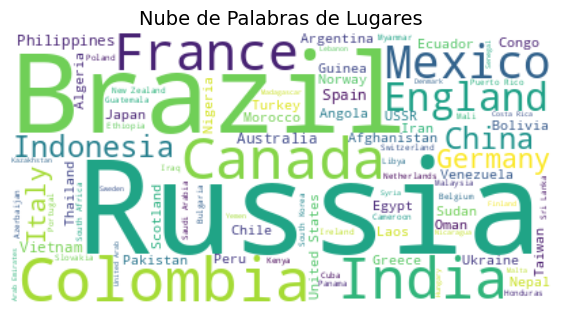

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatena todas las cadenas de texto de la columna 'lugar' en una sola
text = ' '.join(aa['lugar'].astype(str))

# Configura las palabras que deseas excluir
stopwords = set(STOPWORDS)

# Crea el objeto WordCloud
wc = WordCloud(
    background_color='white',     # Color de fondo
    max_words=2000,               # Número máximo de palabras
    stopwords=stopwords           # Palabras a excluir
)

# Genera la nube de palabras
wc.generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de Lugares', fontsize=14)
plt.show()

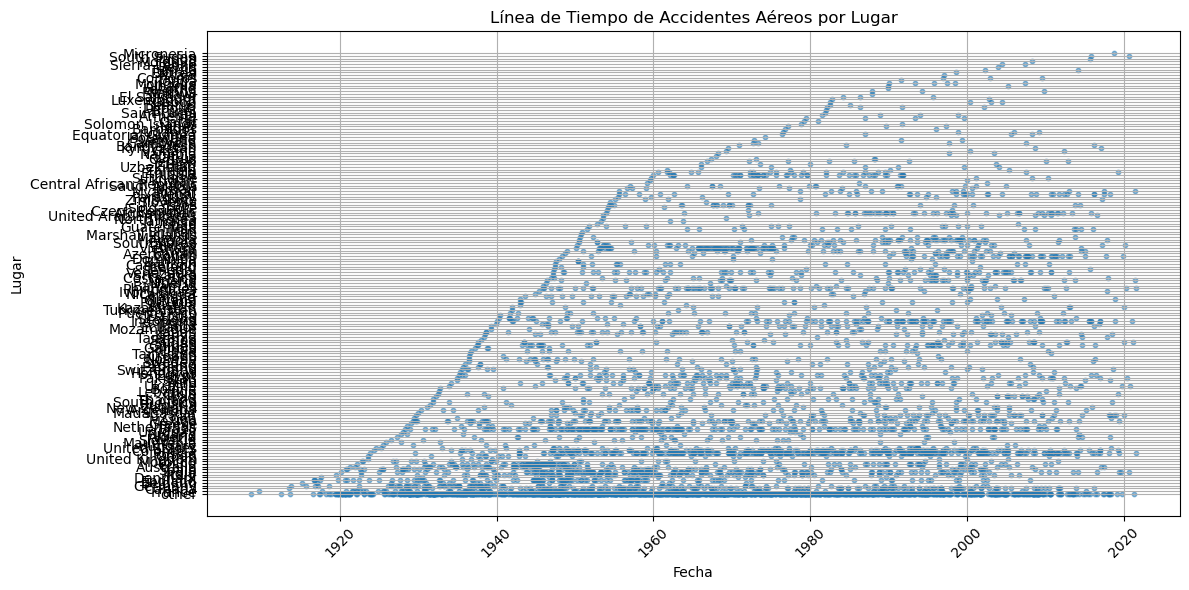

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ordena el DataFrame por la columna 'fecha' para asegurar que las fechas estén en orden cronológico
aa['fecha'] = pd.to_datetime(aa['fecha'])  # Convierte la columna 'fecha' a formato datetime
aa.sort_values(by='fecha', inplace=True)  # Ordena por 'fecha'

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(aa['fecha'], aa['lugar'], s=10, alpha=0.5)
plt.xlabel('Fecha')
plt.ylabel('Lugar')
plt.title('Línea de Tiempo de Accidentes Aéreos por Lugar')
plt.xticks(rotation=45)  # Rotación de etiquetas en el eje x para una mejor legibilidad
plt.grid(True)

# Muestra el gráfico
plt.tight_layout()
plt.show()

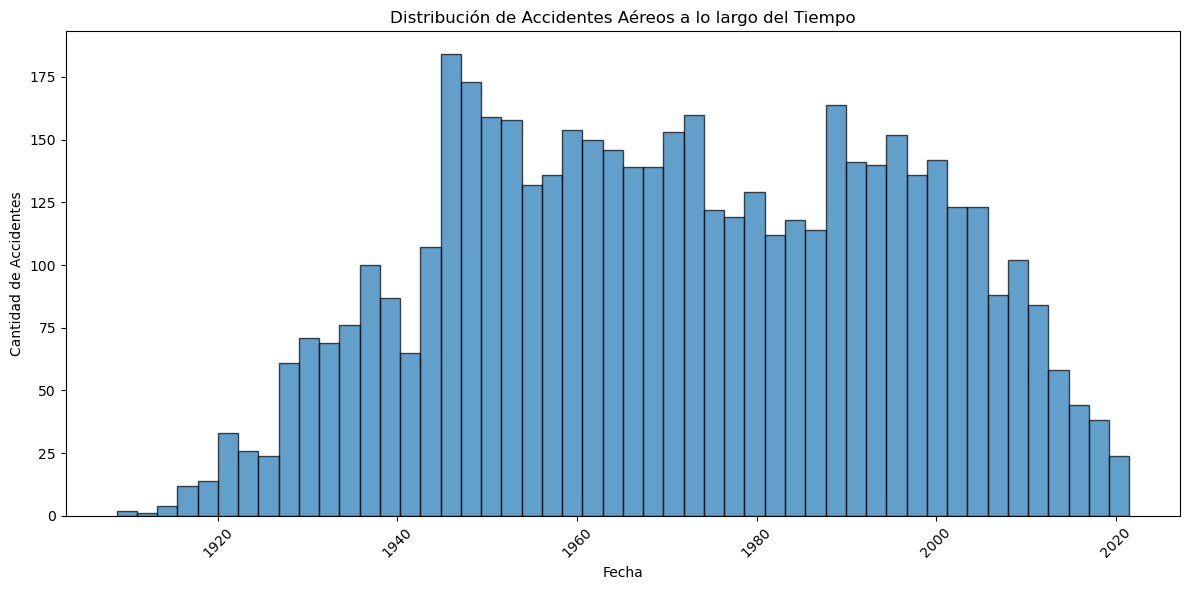

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ordena el DataFrame por la columna 'fecha' para asegurar que las fechas estén en orden cronológico
aa['fecha'] = pd.to_datetime(aa['fecha'])  # Convierte la columna 'fecha' a formato datetime
aa.sort_values(by='fecha', inplace=True)  # Ordena por 'fecha'

# Crea el histograma de fechas
plt.figure(figsize=(12, 6))
plt.hist(aa['fecha'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Accidentes Aéreos a lo largo del Tiempo')
plt.xticks(rotation=45)  # Rotación de etiquetas en el eje x para una mejor legibilidad

# Muestra el gráfico de histograma
plt.tight_layout()
plt.show()



In [ ]:
aa['vuelo_numero'].unique()

array(['?', 'F-AIKG', '7', '599', '6', '4', '1', '14', '34', '23', '15A',
       'LZ 129', '2', '8', '9', '229', '19', '16', '21', '3', '203', '5',
       '71', '7208', '28', 'V-1104', '9035', '777', '63', '218', '-',
       '13', '161', '6001', '142', '45', '216', '42', '105', '16B',
       '6-103', '513', '878', '850', '942', '404', '44', '115', '140',
       '48', '6963', '2207', '665', '521', '605', '410', '121', '311',
       '608', '1629', '923', '10', '009', '572', '611', '700', '4422',
       '1-10', '624', '343', '072', '421', '331', '060', '6427', '100',
       '897R', '557', '11-8', '537', '157', '500', '307', '2501', '903',
       '32', '245', '83', '493', '129', '151', '610', '615', 'CAM5763',
       '44-2', '501', '324', '6780', '101', '4-2', '526A', '416W', '202',
       '251', '201', '376', '841', '1-6-6A', '470', '162', '636',
       '783/057', '318', '18', '512', '723', '627', '783', '304/44',
       '270', '781', '314', '152', '971', '633', '136', '57', '792',
      

In [ ]:
# Reemplazamos los valores nulos por un valor vacío
aa['vuelo_numero'] = aa['vuelo_numero'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['vuelo_numero'] = aa['vuelo_numero'].str.replace('?', '')

aa.vuelo_numero.isna().sum()

0

In [ ]:


# Reemplazamos los valores nulos por un valor vacío
aa['route'] = aa['route'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['route'] = aa['route'].str.replace('?', '')



In [ ]:
aa.route.nunique()


3838

In [ ]:
aa.tipo_aeronave.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [ ]:
# Reemplazamos los valores nulos por un valor vacío
aa['tipo_aeronave'] = aa['tipo_aeronave'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['tipo_aeronave'] = aa['tipo_aeronave'].str.replace('?', '')

In [ ]:
aa.tipo_aeronave.nunique()

2469

In [ ]:
#tomamos  una lista de marcas de aeronaves 
marcas_aeronaves_historicas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
                              'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
                              'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
                              'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
                              'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
                              'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
                              'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
                              'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
                              'Harbin Aircraft Manufacturing Corporation', 'English Electric',
                              'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
                              'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
                              'Sopwith Aviation Company']

In [ ]:
# Función para asignar valores a la columna 'brand'
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'

# Aplicamos la función a la columna 'aircraft_type' para crear la columna 'brand'
aa['tipo_aeronave'] = aa['tipo_aeronave'].apply(assign_brand)

In [ ]:
aa.tail()

,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,Descripcion
5003,2021-03-28,18:35,other,Soloy Helicopters,,Sightseeing Charter,other,N351SH,6,5,1,5,4,1,The sightseeing helicopter crashed after missi...
5004,2021-05-21,18:00,Nigeria,Military - Nigerian Air Force,,,Beechcraft,NAF203,11,7,4,11,7,4,"While on final approach, in poor weather condi..."
5005,2021-06-10,08:00,Myanmar,Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft,4610,14,12,2,12,11,1,The plane was carrying military personnel and ...
5006,2021-07-04,11:30,Philippines,Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed Martin,5125,96,88,8,50,?,?,"While attempting to land at Jolo Airport, the ..."
5007,2021-07-06,15:00,Russia,Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov,RA-26085,28,22,6,28,22,6,The passenger plane crashed into the top of a ...


In [ ]:
aa.total_personas.isna().sum()

0

In [ ]:
# Reemplazamos los valores nulos por un valor vacío
aa['total_personas'] = aa['total_personas'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['total_personas'] = aa['total_personas'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
aa['total_personas'] = pd.to_numeric(aa['total_personas'], errors='coerce')

In [ ]:
aa.total_personas.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  nan,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,
        17.,   4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,
        76.,  83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,
        39.,  31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,
        40.,  69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,
        47.,  70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,
        62., 101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72.,
       106.,  78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132.,
       112.,  84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117.,
       133., 124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109.,
       100.,  75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156.,
       108., 174., 176., 202., 113., 182., 145., 134., 149., 177., 298.,
       346.,  96., 157., 191., 330., 188., 131., 25

In [ ]:
aa.total_personas.nunique()


# Filtramos el DataFrame para registros con 'total_aboard' vacío
filtered_df = aa[aa['total_personas'].isna()]
filtered_df



,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,Descripcion
26,1919-07-21,16:55,other,Wingfoot Air Express Goodyear Tire,,Shuttle,other,?,NaN,?,?,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi..."
103,1925-09-07,nan,France,CIDNA,,,other,?,NaN,?,?,?,?,?,?
347,1934-08-10,nan,China,China National Aviation Corporation,,,Sikorsky Aircraft Corporation,?,NaN,?,?,?,?,?,?
384,1935-08-13,nan,China,China National Aviation Corporation,,,Sikorsky Aircraft Corporation,NV40V,NaN,?,?,?,?,?,Destoryed in a storm.
451,1936-12-26,nan,China,China National Aviation Corporation,,,McDonnell Douglas,NC14269,NaN,?,?,?,?,?,?
652,1942-10-01,nan,China,China National Aviation Corporation,,,McDonnell Douglas,69,NaN,?,?,?,?,?,Crashed while attempting to land after losing ...
754,1944-11-09,nan,Norway,Military - U.S. Army Air Corps,,,other,42-52196,NaN,?,?,?,?,?,?
854,1946-03-18,nan,China,China National Aviation Corporation,,Chunking - Shanghai,other,139,NaN,?,?,?,?,?,Disappeared while en route. Plane never located.
1231,1951-01-20,nan,Peru,Military - TAM,,,McDonnell Douglas,?,NaN,?,?,16,?,?,?
1362,1952-12-22,nan,Syria,Syrian Air,,,McDonnell Douglas,?,NaN,?,?,9,?,?,?


In [ ]:
# Filtramos el DataFrame para registros con 'total_aboard' igual a 0
aa = aa.loc[aa['total_personas'] == 0]
aa

,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,Descripcion
30,1919-10-20,nan,other,Aircraft Transport and Travel,,,De Havilland,G-EAHG,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...
120,1927-01-12,nan,France,Fokker,,Delivery flight,Fokker,G-EBPL,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...
1121,1949-07-13,nan,India,Indian Air Force,,Training,Hawker,?,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...
3144,1981-09-22,12:00,Turkey,Military - Turkish Air Force,,,Northrop Grumman,?,0.0,0,0,0,0,0,The fighter crashed into a village after the p...
3376,1986-03-27,nan,Central African Republic,Military - French Air Force,,,other,?,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...


In [ ]:
aa

,fecha,hora,lugar,empresa_operadora,vuelo_numero,route,tipo_aeronave,registro_aeronave,total_personas,total_pasajeros,total_tripulantes,total_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,Descripcion
30,1919-10-20,nan,other,Aircraft Transport and Travel,,,De Havilland,G-EAHG,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...
120,1927-01-12,nan,France,Fokker,,Delivery flight,Fokker,G-EBPL,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...
1121,1949-07-13,nan,India,Indian Air Force,,Training,Hawker,?,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...
3144,1981-09-22,12:00,Turkey,Military - Turkish Air Force,,,Northrop Grumman,?,0.0,0,0,0,0,0,The fighter crashed into a village after the p...
3376,1986-03-27,nan,Central African Republic,Military - French Air Force,,,other,?,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...


In [ ]:
# Reemplazamos los valores nulos por un valor vacío
aa['total_pasajeros'] = aa['total_pasajeros'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['total_pasajeros'] = aa['total_pasajeros'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
aa['total_pasajeros'] = pd.to_numeric(aa['total_pasajeros'], errors='coerce')

/tmp/ipykernel_63705/380473555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_pasajeros'] = aa['total_pasajeros'].fillna('')
/tmp/ipykernel_63705/380473555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_pasajeros'] = aa['total_pasajeros'].str.replace('?', '')
/tmp/ipykernel_63705/380473555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:


# Reemplazamos los valores nulos por un valor vacío
aa['total_tripulantes'] = aa['total_tripulantes'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['total_tripulantes'] = aa['total_tripulantes'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
aa['tripulantes_fallecidos'] = pd.to_numeric(aa['total_tripulantes'], errors='coerce')



/tmp/ipykernel_63705/1631712659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_tripulantes'] = aa['total_tripulantes'].fillna('')
/tmp/ipykernel_63705/1631712659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_tripulantes'] = aa['total_tripulantes'].str.replace('?', '')
/tmp/ipykernel_63705/1631712659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
# Reemplazamos los valores nulos por un valor vacío
aa['total_fallecidos'] = aa['total_fallecidos'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
aa['total_fallecidos'] = aa['total_fallecidos'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
aa['total_fallecidos'] = pd.to_numeric(aa['total_fallecidos'], errors='coerce')

/tmp/ipykernel_63705/703343122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_fallecidos'] = aa['total_fallecidos'].fillna('')
/tmp/ipykernel_63705/703343122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['total_fallecidos'] = aa['total_fallecidos'].str.replace('?', '')
/tmp/ipykernel_63705/703343122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 30 to 3376
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5 non-null      datetime64[ns]
 1   hora                    5 non-null      object        
 2   lugar                   5 non-null      object        
 3   empresa_operadora       5 non-null      object        
 4   vuelo_numero            5 non-null      object        
 5   route                   5 non-null      object        
 6   tipo_aeronave           5 non-null      object        
 7   registro_aeronave       5 non-null      object        
 8   total_personas          5 non-null      float64       
 9   total_pasajeros         5 non-null      int64         
 10  total_tripulantes       5 non-null      object        
 11  total_fallecidos        5 non-null      int64         
 12  pasajeros_fallecidos    5 non-null      object        
